In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = 10, 8  # that's default image size for this interactive session
pylab.rcParams['figure.dpi']=100

In [2]:
ar0134={}
ar0134['wavelength_nm']=np.arange(400,1025,25)
ar0134['qe_mono']=np.array([0.53,0.6,0.64,0.68,0.69,0.7,0.68,0.67,0.64,0.58,0.54,0.51,0.45,0.4,0.35,0.3,0.25,0.21,0.17,0.14,0.1,0.06,0.05,0.04,0.02])
ar0134['qe_blue']=np.array([0.25,0.45,0.52,0.48,0.32,0.12,0.06,0.03,0.03,0.02,0.03,0.04,0.05,0.04,0.04,0.06,0.17,0.22,0.20,0.15,0.12,0.08,0.06,0.04,0.03])
ar0134['qe_green']=np.array([0.02,0.02,0.02,0.07,0.16,0.56,0.62,0.45,0.3,0.08,0.05,0.06,0.1,0.12,0.13,0.17,0.2,0.18,0.17,0.14,0.12,0.08,0.06,0.04,0.03])
ar0134['qe_red']=np.array([0.07,0.04,0.03,0.03,0.03,0.05,0.04,0.25,0.62,0.56,0.51,0.44,0.40,0.32,0.32,0.29,0.27,0.22,0.20,0.15,0.12,0.08,0.06,0.04,0.03])

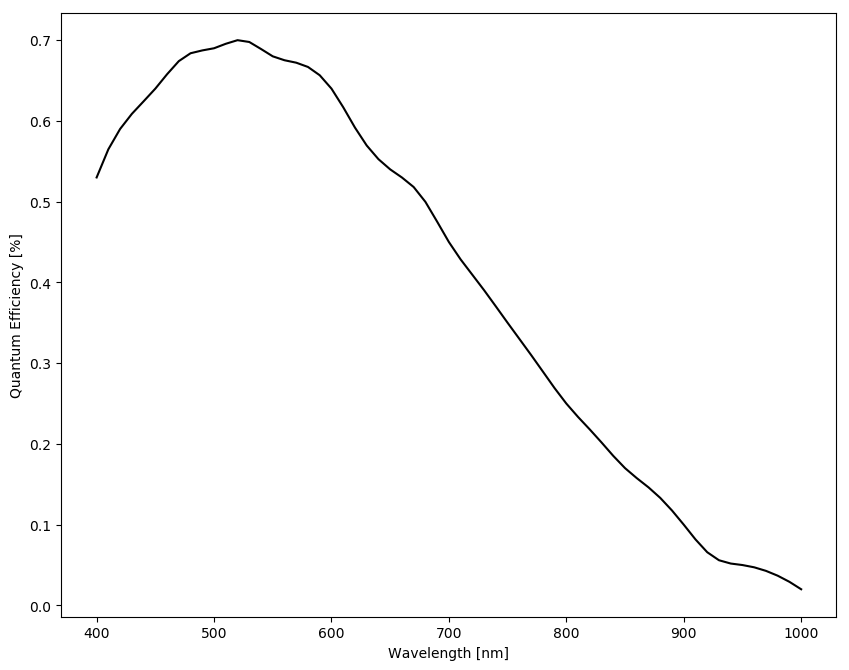

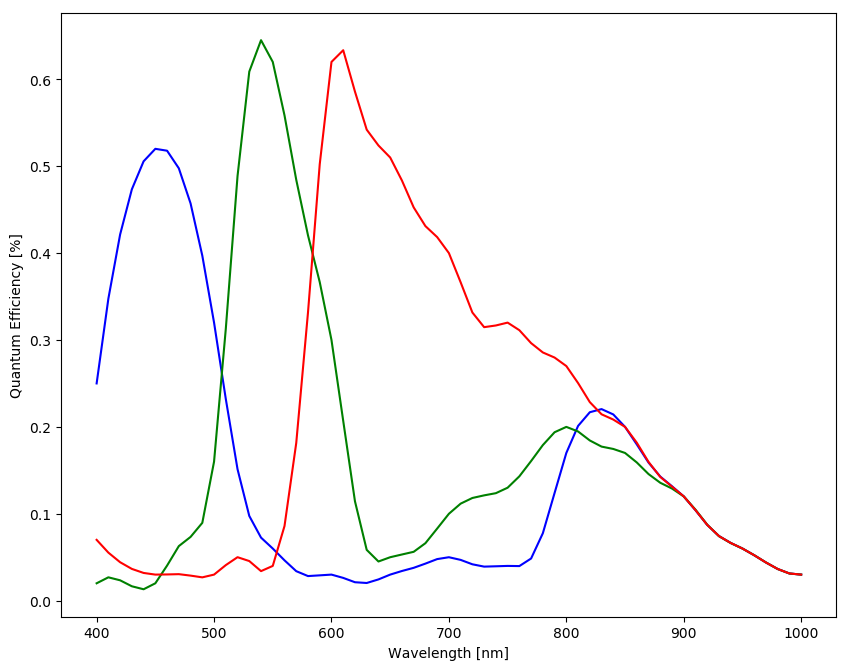

In [3]:
ar0134_mono = interp1d(ar0134['wavelength_nm'],ar0134['qe_mono'],kind='cubic')
ar0134_blue = interp1d(ar0134['wavelength_nm'],ar0134['qe_blue'],kind='cubic')
ar0134_green = interp1d(ar0134['wavelength_nm'],ar0134['qe_green'],kind='cubic')
ar0134_red = interp1d(ar0134['wavelength_nm'],ar0134['qe_red'],kind='cubic')
wavelength_nm_10 = np.arange(400,1010,10)

plt.figure()
plt.plot(wavelength_nm_10,ar0134_mono(wavelength_nm_10),'k-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency [%]')
#plt.title('Quantum Efficiency - AR0134CS Mono')
plt.savefig('Understanding NDVI - AR0134CS Mono.jpg')
plt.show()

plt.figure()
plt.plot(wavelength_nm_10,ar0134_blue(wavelength_nm_10),'b-',
        wavelength_nm_10,ar0134_green(wavelength_nm_10),'g-',
        wavelength_nm_10,ar0134_red(wavelength_nm_10),'r-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency [%]')
#plt.title('Quantum Efficiency - AR0134CS Color')
plt.savefig('Understanding NDVI - AR0134CS Color.jpg')
plt.show()

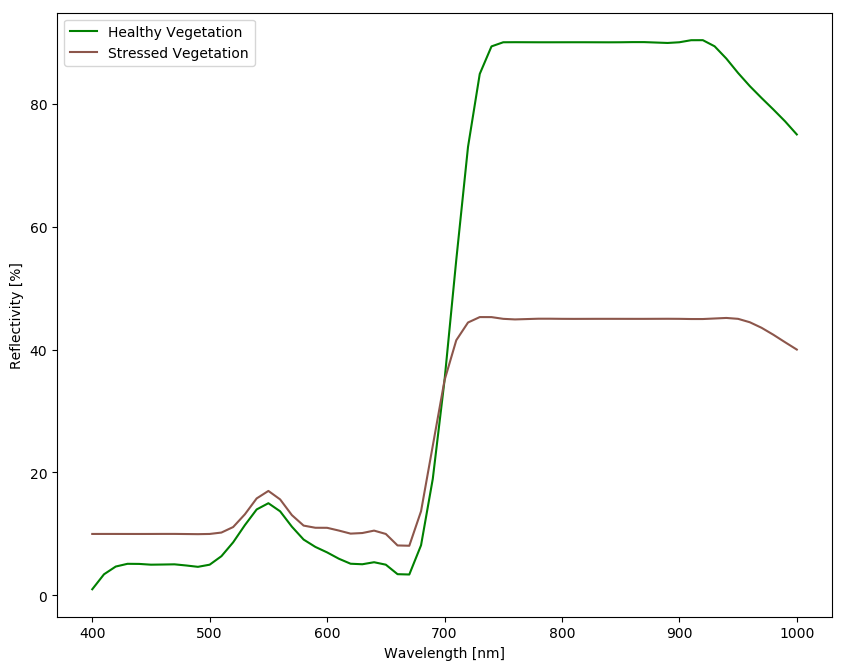

In [4]:
ndvi={}
ndvi['wavelength_nm']=np.arange(400,1025,25)
ndvi['healthy']=np.array([1,5,5,5,5,10,15,10,7,5,5,5,35,80,90,90,90,90,90,90,90,90,85,80,75])
ndvi['stressed']=np.array([10,10,10,10,10,12,17,12,11,10,10,10,35,45,45,45,45,45,45,45,45,45,45,43,40])

healthy = interp1d(ndvi['wavelength_nm'],ndvi['healthy'],kind='cubic')
stressed = interp1d(ndvi['wavelength_nm'],ndvi['stressed'],kind='cubic')

plt.figure()
plt.plot(wavelength_nm_10,healthy(wavelength_nm_10),'g-',label='Healthy Vegetation')
plt.plot(wavelength_nm_10,stressed(wavelength_nm_10),'tab:brown',label='Stressed Vegetation')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectivity [%]')
#plt.title('Reflectivity of Health vs. Stress Vegetation')
plt.savefig('Understanding NDVI - Reflectance.jpg')
plt.show()

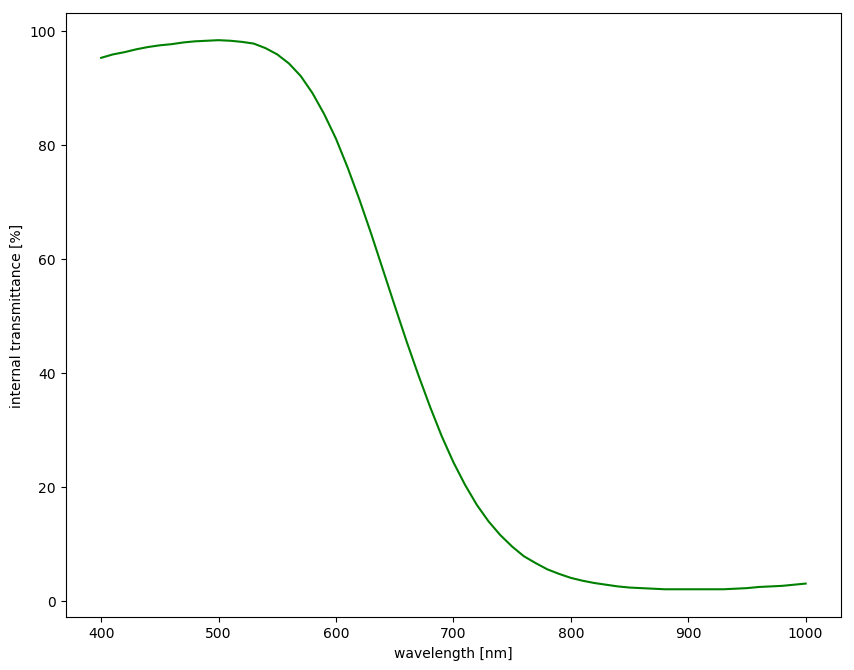

In [5]:
schott_bg38={}
schott_bg38['wavelength_nm']=np.arange(400,1010,10)
schott_bg38['transmittance']=np.array([0.953,0.959,0.963,0.968,0.972,0.975,0.977,0.98,0.982,0.983,0.984,0.983,0.981,0.978,0.97,0.959,0.943,0.921,0.891,0.854,0.811,0.76,0.704,0.644,0.581,0.518,0.456,0.397,0.341,0.289,0.243,0.203,0.168,0.139,0.115,9.5e-2,7.8e-2,6.6e-2,5.5e-2,4.7e-2,4e-2,3.5e-2,3.1e-2,2.8e-2,2.5e-2,2.3e-2,2.2e-2,2.1e-2,2e-2,2e-2,2e-2,2e-2,2e-2,2e-2,2.1e-2,2.2e-2,2.4e-2,2.5e-2,2.6e-2,2.8e-2,3e-2])

plt.figure()
plt.plot(schott_bg38['wavelength_nm'],schott_bg38['transmittance']*100,'g-')
plt.xlabel('wavelength [nm]')
plt.ylabel('internal transmittance [%]')
#plt.title('Internal Transmittance of Schott BG38')
plt.savefig('Understanding NDVI - BG38.jpg')
plt.show()

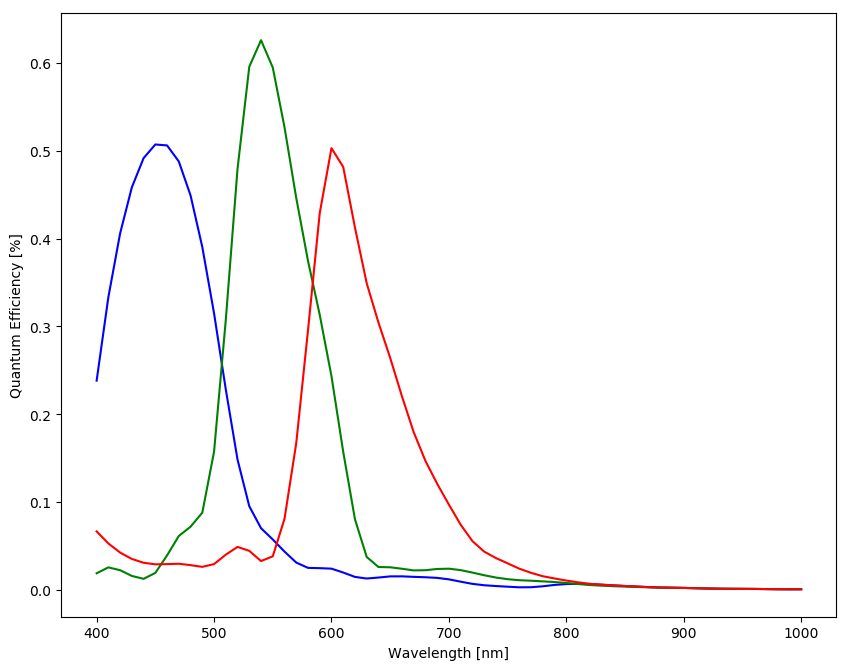

In [6]:
plt.figure()
plt.plot(wavelength_nm_10,ar0134_blue(wavelength_nm_10)*schott_bg38['transmittance'],'b-',
        wavelength_nm_10,ar0134_green(wavelength_nm_10)*schott_bg38['transmittance'],'g-',
        wavelength_nm_10,ar0134_red(wavelength_nm_10)*schott_bg38['transmittance'],'r-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency [%]')
#plt.title('Quantum Efficiency - AR0134CS Color w/ Schott BG38 Filter')
plt.savefig('Understanding NDVI - AR0134CS Color BG38.jpg')
plt.show()

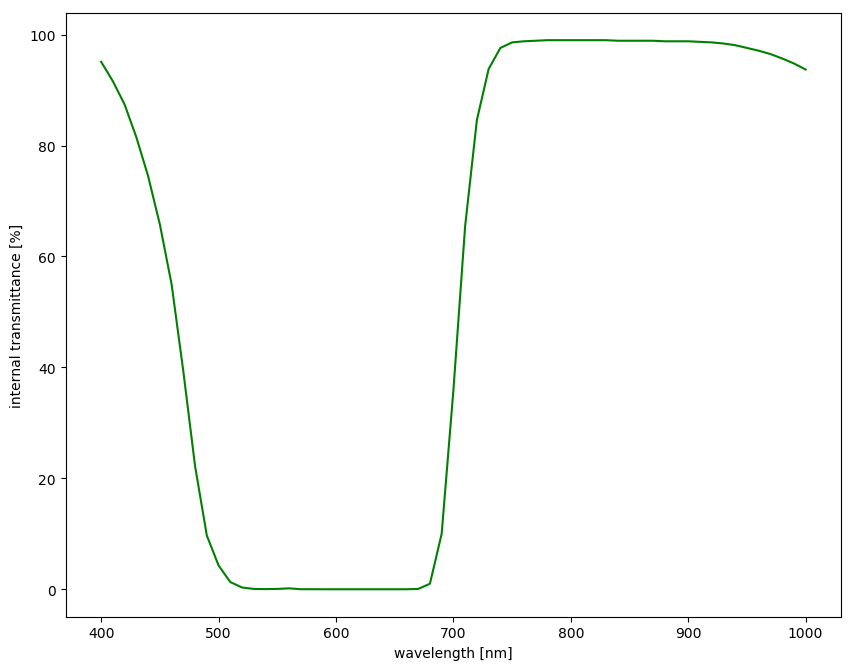

In [7]:
schott_bg3 = {}
schott_bg3['wavelength_nm']=np.arange(400,1010,10)
schott_bg3['transmittance']=np.array([0.951,0.916,0.874,0.815,0.745,0.658,0.550,0.393,0.222,9.7e-2,4.3e-2,1.3e-2,3.2e-3,6.4e-4,3.0e-4,6.2e-4,1.7e-3,1.0e-4,1.1e-4,1.0e-5,1.0e-5,1.3e-5,1.6e-5,1.2e-5,1.0e-5,1.0e-5,4.7e-5,5.9e-4,1.0e-2,0.1,0.359,0.655,0.846,0.938,0.976,0.986,0.988,0.989,0.990,0.990,0.990,0.990,0.990,0.990,0.989,0.989,0.989,0.989,0.988,0.988,0.988,0.987,0.986,0.984,0.981,0.976,0.971,0.965,0.957,0.948,0.937])

plt.figure()
plt.plot(schott_bg3['wavelength_nm'],schott_bg3['transmittance']*100,'g-')
plt.xlabel('wavelength [nm]')
plt.ylabel('internal transmittance [%]')
#plt.title('Internal Transmittance of Schott BG3')
plt.savefig('Understanding NDVI - BG3.jpg')
plt.show()

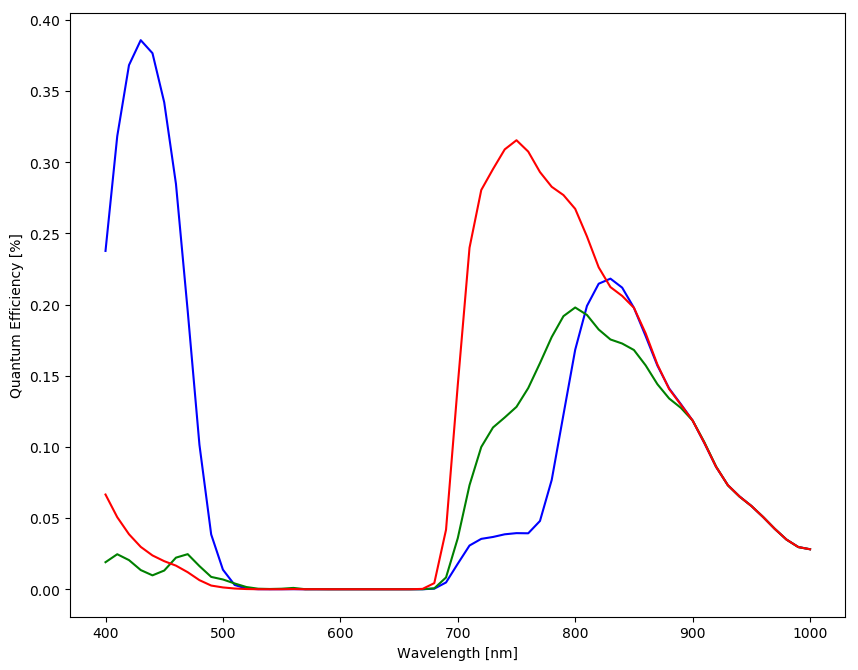

In [8]:
plt.figure()
plt.plot(wavelength_nm_10,ar0134_blue(wavelength_nm_10)*schott_bg3['transmittance'],'b-',
        wavelength_nm_10,ar0134_green(wavelength_nm_10)*schott_bg3['transmittance'],'g-',
        wavelength_nm_10,ar0134_red(wavelength_nm_10)*schott_bg3['transmittance'],'r-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency [%]')
#plt.title('Quantum Efficiency - AR0134CS Color w/ Schott BG3 Filter')
plt.savefig('Understanding NDVI - AR0134CS Color BG3.jpg')
plt.show()

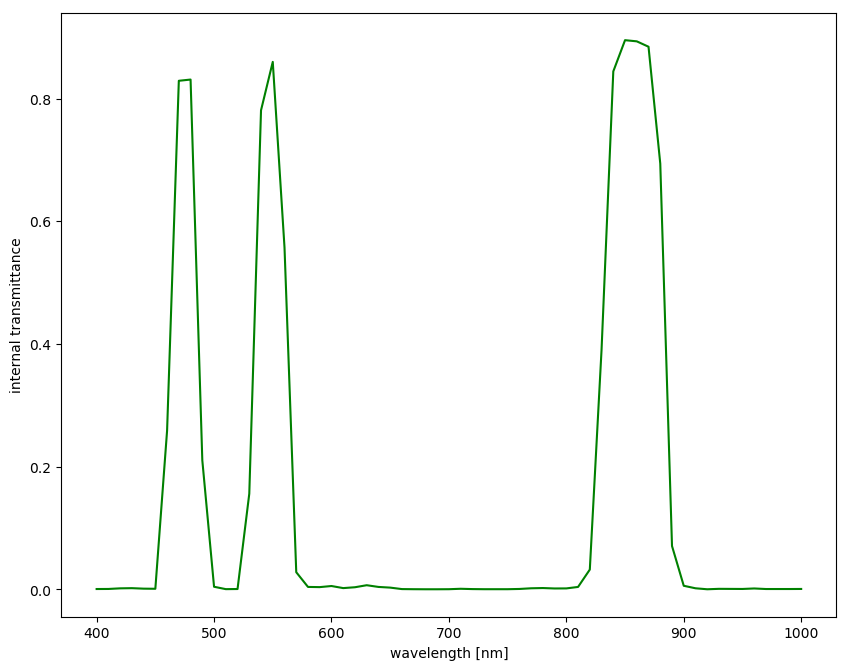

In [9]:
midopt_bgnir = {}
midopt_bgnir['wavelength_nm']=np.arange(400,1010,10)
midopt_bgnir['transmittance']=np.array([0.04,0.05,0.15,0.18,0.10,0.08,25.86,82.89,83.09,21.02,0.41,0.02,0.04,15.58,78.08,85.97,55.71,2.78,0.38,0.35,0.53,0.19,0.33,0.66,0.38,0.27,0.03,0.01,0,0,0.01,0.08,0.03,0.01,0.01,0.01,0.05,0.16,0.2,0.13,0.14,0.38,3.21,39.05,84.42,89.51,89.32,88.44,69.39,7.05,0.57,0.16,0,0.07,0.06,0.05,0.13,0.04,0.04,0.04,0.05])/100

plt.figure()
plt.plot(midopt_bgnir['wavelength_nm'],midopt_bgnir['transmittance'],'g-')
plt.xlabel('wavelength [nm]')
plt.ylabel('internal transmittance')
#plt.title('Internal Transmittance of Midopt Triple Bandpass Blue+Green+850nm NIR')
plt.show()

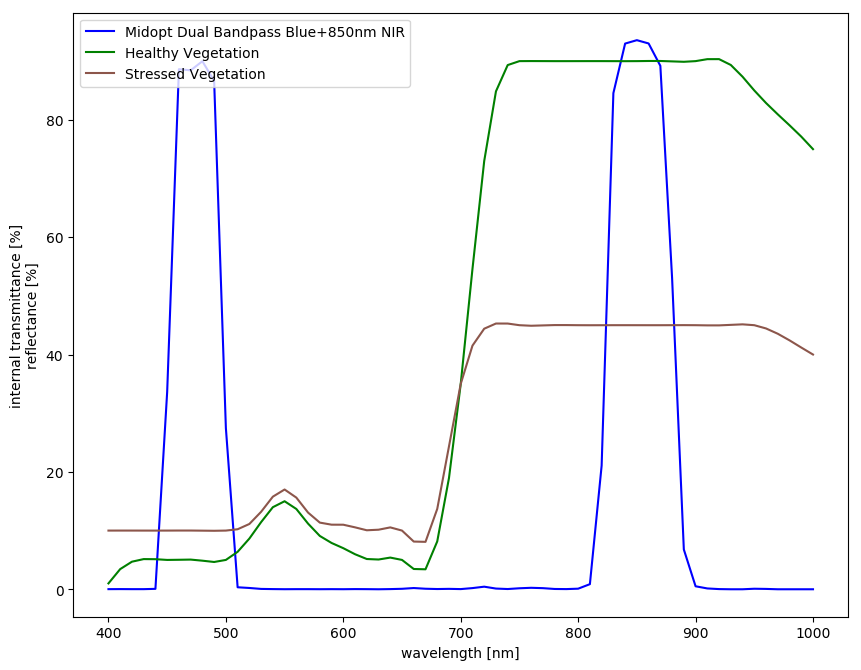

In [18]:
midopt_bnir = {}
midopt_bnir['wavelength_nm']=np.arange(400,1010,10)
midopt_bnir['transmittance']=np.array([0.02,0.03,0.02,0.02,0.07,33.62,88.63,88.43,89.98,86.64,27.47,0.34,0.22,0.06,0.03,0.01,0.02,0.02,0.01,0.02,0.01,0.03,0.02,0,0.03,0.08,0.21,0.09,0.04,0.07,0.03,0.2,0.44, 0.12,0.04,0.17,0.25,0.19,0.05,0.03,0.1,0.87,21.07,84.55,92.99,93.57,93.01,89.20,53.04,6.78,0.51,0.14,0.03,0,0,0.09,0.06,0.0,0,0,0])/100

plt.figure()
plt.plot(midopt_bnir['wavelength_nm'],midopt_bnir['transmittance']*100,'b-',label='Midopt Dual Bandpass Blue+850nm NIR')
plt.plot(wavelength_nm_10,healthy(wavelength_nm_10),'g-',label='Healthy Vegetation')
plt.plot(wavelength_nm_10,stressed(wavelength_nm_10),'tab:brown',label='Stressed Vegetation')
plt.legend(loc=2)
plt.xlabel('wavelength [nm]')
plt.ylabel('internal transmittance [%]\nreflectance [%]')
#plt.title('Internal Transmittance of Midopt Dual Bandpass Blue+850nm NIR')
plt.savefig('Understanding NDVI - Midopt BlueNIR.jpg')
plt.show()

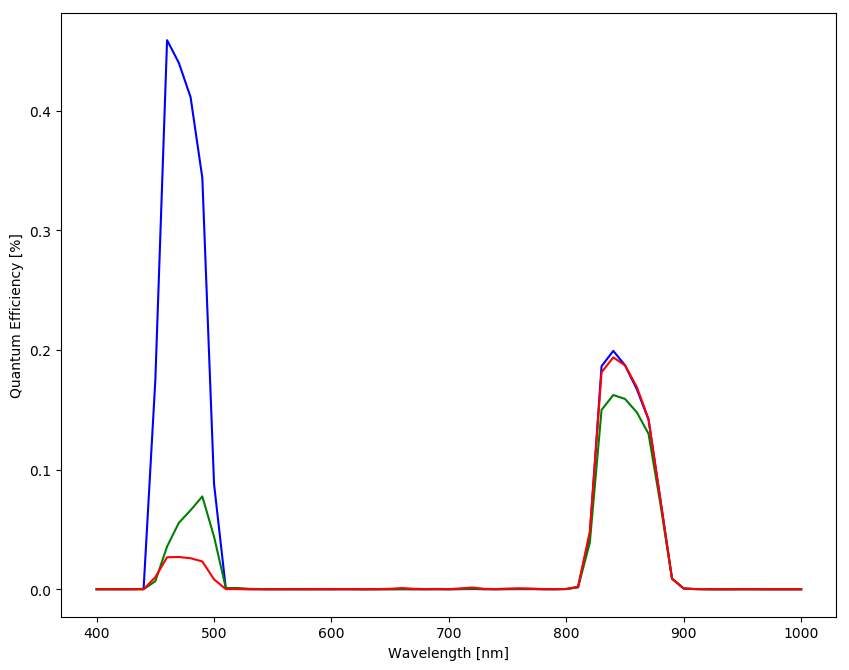

In [11]:
plt.figure()
plt.plot(wavelength_nm_10,ar0134_blue(wavelength_nm_10)*midopt_bnir['transmittance'],'b-',
        wavelength_nm_10,ar0134_green(wavelength_nm_10)*midopt_bnir['transmittance'],'g-',
        wavelength_nm_10,ar0134_red(wavelength_nm_10)*midopt_bnir['transmittance'],'r-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency [%]')
#plt.title('Quantum Efficiency - AR0134CS Color w/ Midopt Blue+850nm IR Filter')
plt.savefig('Understanding NDVI - AR0134CS BlueIR.jpg')
plt.show()

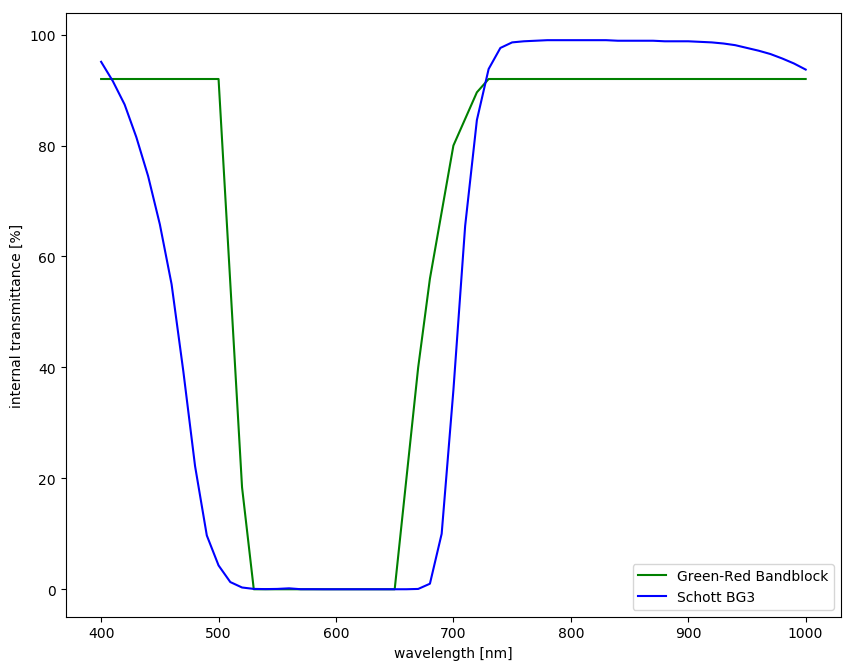

In [12]:
event38_bandblock = {}
event38_bandblock['wavelength_nm'] = np.arange(400,1025,25)
event38_bandblock['transmittance'] = np.array([0.92,0.92,0.92,0.92,0.92,0,0,0,0,0,0,0.5,0.8,0.92,0.92,0.92,0.92,0.92,0.92,0.92,0.92,0.92,0.92,0.92,0.92])
event38_bandblock_10 = interp1d(event38_bandblock['wavelength_nm'],event38_bandblock['transmittance'])

plt.figure()
plt.plot(wavelength_nm_10,event38_bandblock_10(wavelength_nm_10)*100,'g-',label='Green-Red Bandblock')
plt.plot(schott_bg3['wavelength_nm'],schott_bg3['transmittance']*100,'b-',label='Schott BG3')
plt.xlabel('wavelength [nm]')
plt.ylabel('internal transmittance [%]')
#plt.title('Comparison of transmittance between Green-Red Bandblock and Schott BG3')
plt.legend()
plt.savefig('Understanding NDVI - GreenRed Bandblock.jpg')
plt.show()

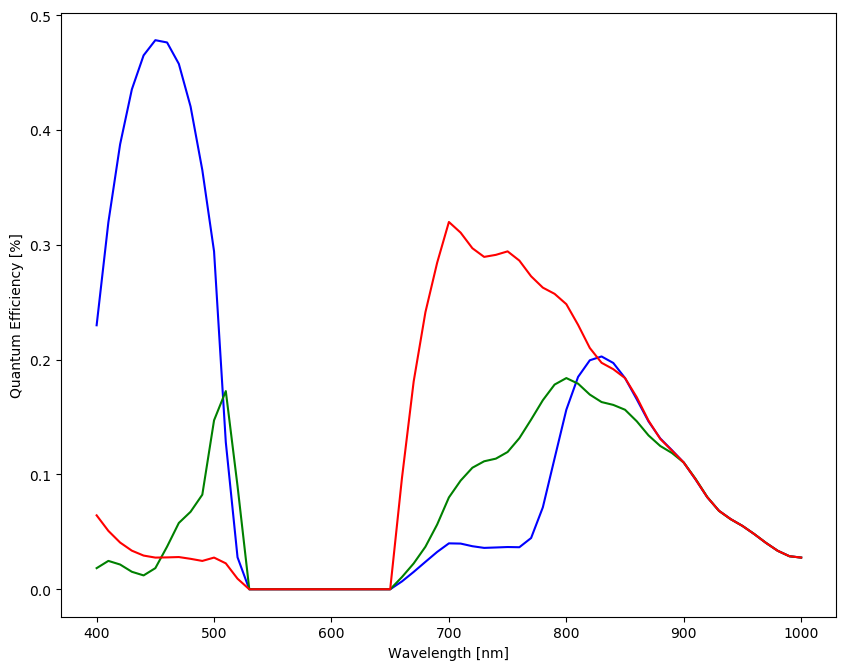

In [13]:
plt.figure()
plt.plot(wavelength_nm_10,ar0134_blue(wavelength_nm_10)*event38_bandblock_10(wavelength_nm_10),'b-',
        wavelength_nm_10,ar0134_green(wavelength_nm_10)*event38_bandblock_10(wavelength_nm_10),'g-',
        wavelength_nm_10,ar0134_red(wavelength_nm_10)*event38_bandblock_10(wavelength_nm_10),'r-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Quantum Efficiency [%]')
#plt.title('Quantum Efficiency - AR0134CS Color w/ Green+Red BandBlock Filter')
plt.savefig('Understanding NDVI - AR0134CS Color Bandblock.jpg')
plt.show()